In [186]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

In [187]:
#Read error dataframe for all simulations
function='tanh'
errors=pd.read_csv('../data/'+ 'errors_' + str(function) + '.csv',index_col=0)
display(errors)

,sigma,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,0.038346,0.031069,0.001119,0.009678,0.048355,0.034498,0.001325,0.011692,0,0
1,0.0,0.011996,0.106369,0.002785,0.332193,0.015287,0.112211,0.003340,0.497563,1,0
2,0.0,0.045330,0.568604,0.001012,0.058189,0.119820,0.574555,0.001299,0.072254,2,0
3,0.0,0.017690,0.168191,0.000309,0.041747,0.043636,0.169878,0.000399,0.048745,3,0
4,0.0,0.015367,0.066641,0.000170,0.002949,0.019958,0.070403,0.000248,0.004091,4,0
...,...,...,...,...,...,...,...,...,...,...,...
325,0.2,0.059918,0.041152,0.025700,0.111698,0.077847,0.049771,0.039826,0.118180,5,2
326,0.2,0.138111,0.465183,0.047928,0.275630,0.168871,0.470017,0.074429,0.277328,6,2
327,0.2,0.091140,0.182207,0.095380,0.024869,0.117414,0.183915,0.110881,0.027818,7,2
328,0.2,0.111839,0.209496,0.070767,1.238419,0.135749,0.217007,0.076842,1.503048,8,2


In [188]:
#Calculate medians over 30 simulations and drop 'maes'
columns_errors=['rmse_nn_train','rmse_nn_test','rmse_mdl_train','rmse_mdl_test']
medians=errors.groupby(['sigma'],as_index=False)[columns_errors].median()
display(medians)

,sigma,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test
0,0.00,0.017356,0.088850,0.000583,0.046586
1,0.02,0.021286,0.079044,0.011320,0.131624
2,0.04,0.025385,0.100456,0.023240,0.038125
3,0.06,0.032712,0.164878,0.027520,0.103755
4,0.08,0.049341,0.091179,0.042324,0.110910
5,0.10,0.054660,0.155441,0.050440,0.095145
6,0.12,0.080489,0.181612,0.055367,0.131610
7,0.14,0.078299,0.102278,0.076024,0.194697
8,0.16,0.080551,0.237049,0.050001,0.181378
9,0.18,0.117082,0.137691,0.097960,0.341428


In [189]:
#Calculate errors of medians
#Start with sigma=0.0 and the rmse of the training set of neural networks as a minimally working example
sigma_0=errors[errors['sigma']==0.0]
display(sigma_0)
mnntr=list(sigma_0.rmse_nn_train)

,sigma,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,0.038346,0.031069,0.001119,9.678334e-03,0.048355,0.034498,0.001325,1.169205e-02,0,0
1,0.0,0.011996,0.106369,0.002785,3.321931e-01,0.015287,0.112211,0.003340,4.975634e-01,1,0
2,0.0,0.045330,0.568604,0.001012,5.818908e-02,0.119820,0.574555,0.001299,7.225381e-02,2,0
3,0.0,0.017690,0.168191,0.000309,4.174655e-02,0.043636,0.169878,0.000399,4.874519e-02,3,0
4,0.0,0.015367,0.066641,0.000170,2.948595e-03,0.019958,0.070403,0.000248,4.091270e-03,4,0
5,0.0,0.007376,0.071449,0.000487,1.408517e-01,0.012901,0.088791,0.000684,1.689972e-01,5,0
6,0.0,0.006577,0.091553,0.000324,1.811364e-02,0.016011,0.093125,0.000389,2.311304e-02,6,0
7,0.0,0.007777,0.060940,0.000700,2.582044e-02,0.014318,0.061244,0.000904,3.364340e-02,7,0
8,0.0,0.007191,0.098977,0.000051,5.952950e-02,0.015660,0.099978,0.000071,8.638921e-02,8,0
9,0.0,0.002033,0.026621,0.000014,2.454331e-01,0.002766,0.032740,0.000016,6.222422e-01,9,0


In [190]:
#bootstrapping to get the error of the median. 

from scipy.stats import bootstrap

mnntr=(mnntr,)

bs_iterations=20;

bs_medians=[];bs_distributions=[]
for i in range(bs_iterations):
    bs=bootstrap(mnntr, np.median, n_resamples=30, confidence_level=0.9, random_state=None)
    bs_dist=bs.bootstrap_distribution; bs_distributions.append(bs_dist)
    median_bs=np.median(bs_dist)
    medians_bs.append(median_bs)

#Take the variance of the bootstrap distributions as the error
median_var=np.var(medians_bs)

print(median_var)

0.0010702608311442521


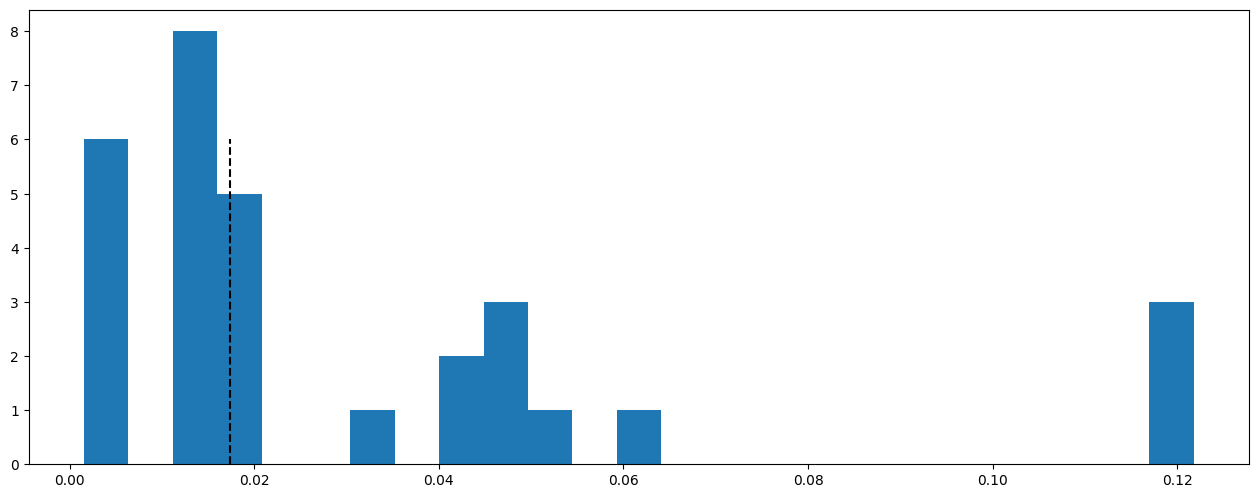

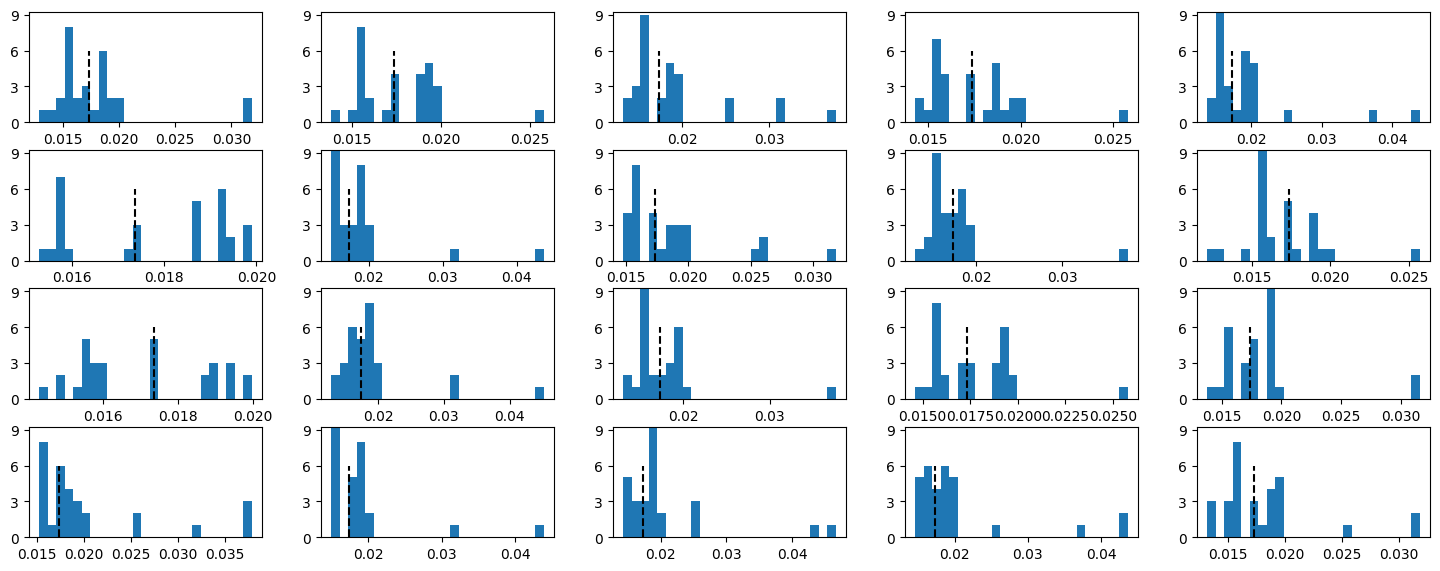

In [191]:
#Are bootstrap samplings representative of the median of the original distribution?

#Original data
fig, ax_ori = plt.subplots()
ax_ori.hist(mnntr,bins=25)
ax_ori.vlines(x=medians.rmse_nn_train[0], ymin=0, ymax=6, color='k',linestyle='--')
plt.show()

#20 bootstrapping samples

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches 
width=40*cm;height=15*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]
rows=4;cols=5

gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.25,hspace=0.25)
#Plot bootstrap distribution
h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        ax_rc.hist(bs_distributions[h],bins=25)
        ax_rc.vlines(x=medians.rmse_nn_train[0], ymin=0, ymax=6, color='k',linestyle='--')

        ax_rc.set_ylim(0,9.25)
        ax_rc.set_yticks([0, 3, 6, 9])
        
        h+=1

In [183]:
#Repeat for the four errors
median_errors_s0={'sigma':0.0}
for i in columns_errors:

    bs_iterations=20;
    bs_medians=[];bs_distributions=[]
    for j in range(bs_iterations):
        bs=bootstrap(error, np.median, n_resamples=30, confidence_level=0.9, random_state=None)
        bs_dist=bs.bootstrap_distribution; bs_distributions.append(bs_dist)
        median_bs=np.median(bs_dist)
        medians_bs.append(median_bs)

    median_errors_s0['error_' +i]=[np.var(medians_bs)]


median_errors_s0_df=pd.DataFrame.from_dict(median_errors_s0)
medians_sigma_0=medians.join(median_errors_s0_df.set_index('sigma'), on='sigma')

display(medians_sigma_0)

,sigma,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,error_rmse_nn_train,error_rmse_nn_test,error_rmse_mdl_train,error_rmse_mdl_test
0,0.00,0.017356,0.088850,0.000583,0.046586,0.001074,0.001072,0.00107,0.001068
1,0.02,0.021286,0.079044,0.011320,0.131624,NaN,NaN,NaN,NaN
2,0.04,0.025385,0.100456,0.023240,0.038125,NaN,NaN,NaN,NaN
3,0.06,0.032712,0.164878,0.027520,0.103755,NaN,NaN,NaN,NaN
4,0.08,0.049341,0.091179,0.042324,0.110910,NaN,NaN,NaN,NaN
5,0.10,0.054660,0.155441,0.050440,0.095145,NaN,NaN,NaN,NaN
6,0.12,0.080489,0.181612,0.055367,0.131610,NaN,NaN,NaN,NaN
7,0.14,0.078299,0.102278,0.076024,0.194697,NaN,NaN,NaN,NaN
8,0.16,0.080551,0.237049,0.050001,0.181378,NaN,NaN,NaN,NaN
9,0.18,0.117082,0.137691,0.097960,0.341428,NaN,NaN,NaN,NaN


In [184]:
#Repeat for all sigmas
sigmas=[0.0, 0.02, 0.04,0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20]
median_errors={}

for sigma in sigmas:
    for i in columns_errors: 
        error=(list(sigma_0[i]),)

        bs_iterations=20;
        bs_medians=[];bs_distributions=[]
        
        for j in range(bs_iterations):
            bs=bootstrap(error, np.median, n_resamples=30, confidence_level=0.9, random_state=None)
            bs_dist=bs.bootstrap_distribution; bs_distributions.append(bs_dist)
            median_bs=np.median(bs_dist)
            medians_bs.append(median_bs)

        try:
            median_errors['error_' +i].append(np.var(medians_bs))
        except KeyError:
            median_errors['error_' +i]=[np.var(medians_bs)]

                                              
median_errors_df=pd.DataFrame.from_dict(median_errors)
median_errors_df['sigma']=sigmas
display(median_errors_df)

medians=medians.join(median_errors_df.set_index('sigma'), on='sigma')
display(medians)

,error_rmse_nn_train,error_rmse_nn_test,error_rmse_mdl_train,error_rmse_mdl_test,sigma
0,0.001067,0.001070,0.001071,0.001069,0.00
1,0.001067,0.001070,0.001071,0.001069,0.02
2,0.001068,0.001071,0.001071,0.001070,0.04
3,0.001068,0.001071,0.001072,0.001070,0.06
4,0.001068,0.001071,0.001072,0.001070,0.08
5,0.001069,0.001072,0.001072,0.001070,0.10
6,0.001069,0.001072,0.001072,0.001070,0.12
7,0.001069,0.001072,0.001073,0.001071,0.14
8,0.001069,0.001072,0.001073,0.001071,0.16
9,0.001070,0.001073,0.001073,0.001071,0.18


,sigma,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,error_rmse_nn_train,error_rmse_nn_test,error_rmse_mdl_train,error_rmse_mdl_test
0,0.00,0.017356,0.088850,0.000583,0.046586,0.001067,0.001070,0.001071,0.001069
1,0.02,0.021286,0.079044,0.011320,0.131624,0.001067,0.001070,0.001071,0.001069
2,0.04,0.025385,0.100456,0.023240,0.038125,0.001068,0.001071,0.001071,0.001070
3,0.06,0.032712,0.164878,0.027520,0.103755,0.001068,0.001071,0.001072,0.001070
4,0.08,0.049341,0.091179,0.042324,0.110910,0.001068,0.001071,0.001072,0.001070
5,0.10,0.054660,0.155441,0.050440,0.095145,0.001069,0.001072,0.001072,0.001070
6,0.12,0.080489,0.181612,0.055367,0.131610,0.001069,0.001072,0.001072,0.001070
7,0.14,0.078299,0.102278,0.076024,0.194697,0.001069,0.001072,0.001073,0.001071
8,0.16,0.080551,0.237049,0.050001,0.181378,0.001069,0.001072,0.001073,0.001071
9,0.18,0.117082,0.137691,0.097960,0.341428,0.001070,0.001073,0.001073,0.001071
